# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [9]:
from scipy.stats import uniform
x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b-a)*x
print(randoms)

[2.63774092 2.32011953 2.48678242 2.55021887 2.98309668 2.09190382
 2.90932986 2.96285738 2.19207063 2.30943239]


**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

In [5]:
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt

In [22]:
# your code here
def cont(a,b,c):
    contin_uniform_distr = np.random.uniform(low = a, high = b, size = c)
    return contin_uniform_distr

#cont(10,15,100)

Text(0.5, 1.0, '10-60-1000')

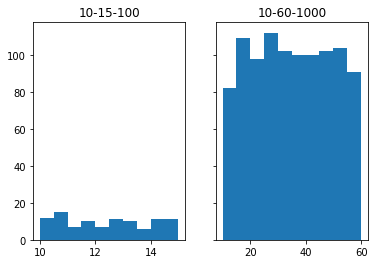

In [21]:
fig, axs = plt.subplots(1,2, sharey = True)
axs[0].hist(cont(10,15,100), bins = 10)
axs[0].set_title("10-15-100")
axs[1].hist(cont(10,60,1000), bins = 10)
axs[1].set_title("10-60-1000")

How are the two distributions different?

In [ ]:
# your answer here:
# The second distribution naturally has a higher frequency for each observation and has a higher ceiling(max. number.

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

Text(0.5, 1.0, '10-50-1000')

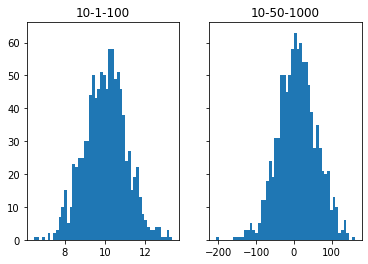

In [28]:
# your code here
def norm(avg,std,count):
    normal = np.random.normal(avg, std, count)
    return normal

# plotting
fig, axs = plt.subplots(1,2, sharey = True)
axs[0].hist(norm(10,1,1000), bins = 50)
axs[0].set_title("10-1-100")
axs[1].hist(norm(10,50,1000), bins = 50)
axs[1].set_title("10-50-1000")


How are the two distributions different?

In [ ]:
# your answer here:
# The data in the right plot is much more spread out due to the higher std.

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

In [30]:
import pandas as pd
df = pd.read_csv('vehicles.csv')
df.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


(array([6.000e+01, 3.000e+00, 2.000e+00, 8.000e+00, 8.000e+00, 1.000e+01,
        2.500e+01, 4.200e+01, 1.600e+02, 1.370e+02, 4.210e+02, 7.050e+02,
        1.754e+03, 2.305e+03, 1.580e+03, 4.020e+03, 3.167e+03, 3.092e+03,
        3.231e+03, 3.529e+03, 2.308e+03, 2.305e+03, 6.500e+01, 2.348e+03,
        1.940e+03, 8.600e+01, 1.245e+03, 3.000e+01, 5.000e+00, 7.300e+02,
        0.000e+00, 4.390e+02, 0.000e+00, 0.000e+00, 1.300e+02, 0.000e+00,
        0.000e+00, 0.000e+00, 3.600e+01, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.100e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 5.000e+00]),
 array([ 0.06      ,  1.00054286,  1.94108571,  2.88162857,  3.82217143,
         4.76271429,  5.70325714,  6.6438    ,  7.58434286,  8.52488571,
         9.46542857, 10.40597143, 11.34651429, 12.28705714, 13.2276    ,
        14.16814286, 15.10868571, 16.04922857, 16.98977143, 17.93031429,
        18.87085714, 19.8114    , 20.75194286, 21.69248571, 22.63302857,
        23.

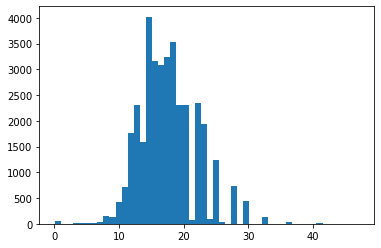

In [43]:
# your code here
plt.hist(df['Fuel Barrels/Year'], 50) 


2. CO2 Emission Grams/Mile 

(array([5.000e+00, 4.000e+00, 7.000e+00, 1.400e+01, 4.000e+00, 2.400e+01,
        5.400e+01, 1.590e+02, 1.480e+02, 4.470e+02, 1.061e+03, 1.349e+03,
        2.219e+03, 1.797e+03, 3.779e+03, 3.264e+03, 3.145e+03, 3.232e+03,
        3.499e+03, 2.271e+03, 2.450e+02, 2.214e+03, 2.276e+03, 1.460e+02,
        1.944e+03, 3.600e+01, 1.225e+03, 3.700e+01, 7.090e+02, 3.000e+00,
        6.000e+00, 4.370e+02, 3.000e+00, 0.000e+00, 1.270e+02, 0.000e+00,
        0.000e+00, 0.000e+00, 3.600e+01, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.100e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 5.000e+00]),
 array([  37.        ,   61.65142857,   86.30285714,  110.95428571,
         135.60571429,  160.25714286,  184.90857143,  209.56      ,
         234.21142857,  258.86285714,  283.51428571,  308.16571429,
         332.81714286,  357.46857143,  382.12      ,  406.77142857,
         431.42285714,  456.07428571,  480.72571429,  505.37714286,
         530.02857143,  554.68      

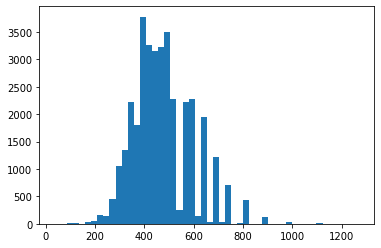

In [42]:
# your code here
plt.hist(df['CO2 Emission Grams/Mile'], 50) 

3. Combined MPG

(array([5.000e+00, 2.100e+01, 4.000e+01, 1.310e+02, 4.410e+02, 7.410e+02,
        1.255e+03, 1.947e+03, 2.241e+03, 2.315e+03, 2.420e+03, 3.559e+03,
        3.282e+03, 3.093e+03, 3.158e+03, 2.247e+03, 1.794e+03, 1.546e+03,
        1.278e+03, 1.067e+03, 6.920e+02, 6.390e+02, 4.530e+02, 3.710e+02,
        2.610e+02, 1.690e+02, 1.760e+02, 1.620e+02, 7.100e+01, 5.800e+01,
        4.100e+01, 4.300e+01, 2.300e+01, 6.500e+01, 3.800e+01, 3.700e+01,
        7.000e+00, 5.000e+00, 5.000e+00, 1.100e+01, 1.600e+01, 2.000e+00,
        0.000e+00, 1.500e+01, 0.000e+00, 5.000e+00, 4.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00]),
 array([ 7.  ,  7.98,  8.96,  9.94, 10.92, 11.9 , 12.88, 13.86, 14.84,
        15.82, 16.8 , 17.78, 18.76, 19.74, 20.72, 21.7 , 22.68, 23.66,
        24.64, 25.62, 26.6 , 27.58, 28.56, 29.54, 30.52, 31.5 , 32.48,
        33.46, 34.44, 35.42, 36.4 , 37.38, 38.36, 39.34, 40.32, 41.3 ,
        42.28, 43.26, 44.24, 45.22, 46.2 , 47.18, 48.16, 49.14, 50.12,
        51.1 , 52.08,

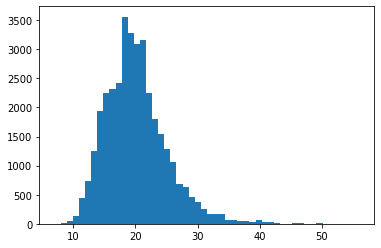

In [41]:
# your code here
plt.hist(df['Combined MPG'], 50) 

Which one(s) of the variables are nearly normally distributed? How do you know?

In [39]:
# you answer here:

# In the normal distribution the man is in the middle and 99% of observations fall within 3 standard deviation around the mean.


df.describe()

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
count,35952.00000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000
mean,2000.71640,3.338493,5.765076,17.609056,17.646139,23.880646,19.929322,475.316339,1892.598465
std,10.08529,1.359395,1.755268,4.467283,4.769349,5.890876,5.112409,119.060773,506.958627
min,1984.00000,0.600000,2.000000,0.060000,6.000000,9.000000,7.000000,37.000000,600.000000
25%,1991.00000,2.200000,4.000000,14.699423,15.000000,20.000000,16.000000,395.000000,1500.000000
50%,2001.00000,3.000000,6.000000,17.347895,17.000000,24.000000,19.000000,467.736842,1850.000000
75%,2010.00000,4.300000,6.000000,20.600625,20.000000,27.000000,23.000000,555.437500,2200.000000
max,2017.00000,8.400000,16.000000,47.087143,58.000000,61.000000,56.000000,1269.571429,5800.000000


## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with the size of 1 and 100.

1. Plot the distributions as histograms with the nubmer of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

Text(0.5, 1.0, '#100')

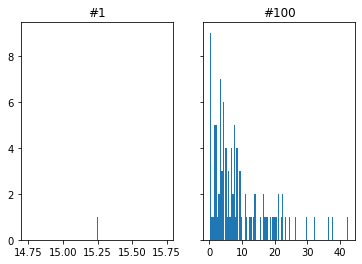

In [50]:
# your code here
def expo(size):
    mean = 10
    exp = np.random.exponential(mean, size)
    return exp

fig, axs = plt.subplots(1,2, sharey = True)
axs[0].hist(expo(1), bins = 100)
axs[0].set_title("#1")
axs[1].hist(expo(100), bins = 100)
axs[1].set_title("#100")
    

How are the two distributions different?

In [ ]:
# your answer here:


## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

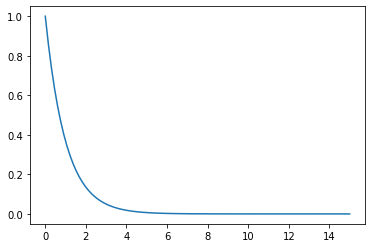

In [53]:
# your answer here
# Hint: This is same as saying P(x<15)
from scipy.stats import expon
exp = expon(10)  

# plotting
x = np.linspace(0,15,100)
y = expon.pdf(x)
fig, ax = plt.subplots(1, 1)
ax.plot(x,y)

In [55]:
print((exp.cdf(14))*100,"%")

98.16843611112658 %


What is the probability that the customer will spend more than 15 minutes

In [56]:
# your answer here
print((1 - exp.cdf(15))*100,"%")

0.6737946999085476 %
